In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
sy.init_printing() 

# <font face="gotham" color="purple"> 线性变换 </font>

这一章有许多新的术语，然而它们对我们来说并不完全陌生。

设$V$和$W$为向量空间。若且唯若对于所有$u,v\in V$和所有$c\in R$，映射$T:\ V\rightarrow W$满足

$$
T(u+v)=T(u)+T(v)\quad \text{和} \quad T(cu)=cT(u)
$$

则称$T$为<font face="gotham" color="red">线性变换</font>。如果$T:\ V\rightarrow W$，则称$T$为<font face="gotham" color="red">线性算子</font>。对于每个$u\in V$，向量$w=T(u)$称为$T$下$u$的<font face="gotham" color="red">像</font>。

## <font face="gotham" color="purple"> 参数函数绘图 </font>

我们需要一个工具来说明线性变换的思想。

我们希望通过一个方程来绘制向量空间中的任意直线：<font face="gotham" color="red"> $p = p_0+tv$</font>。我们需要知道向量$p_0$和$v$来绘制这条直线。

例如，$p_0 = (2, 6)$，$v=(5, 3)$，$p = (x, y)$，将它们代入我们的方程。
$$
\left[
\begin{matrix}
x\\y
\end{matrix}
\right]=\left[
\begin{matrix}
2\\6
\end{matrix}
\right]+
t\left[
\begin{matrix}
5\\3
\end{matrix}
\right]
$$

我们将创建一个图来说明线性变换，稍后。

In [3]:
def paraEqPlot(p0, v0, p1, v1):
    t = np.linspace(-5, 5)
    ################### First Line ####################
    fig, ax = plt.subplots(figsize = (10, 10))
    x = p0[0,:] + v0[0,:]*t
    y = p0[1,:] + v0[1,:]*t
    ax.plot(x, y, lw = 3, color = 'red')
    ax.grid(True)
    ax.scatter(p0[0,:], p0[1,:], s = 150, ec = 'red', fc = 'black', zorder = 3)
    
    ################### First Line ####################
    x = p1[0,:] + v1[0,:]*t
    y = p1[1,:] + v1[1,:]*t
    ax.plot(x, y, lw = 3, color = 'blue')
    ax.grid(True)
    ax.scatter(p1[0,:], p1[1,:], s = 150, ec = 'red', fc = 'black', zorder = 3)
    
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')

    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    string =  '$(%.d, %.d)$' % (p0[0,:], p0[1,:])
    ax.text(x= p0[0,:]+.5, y = p0[1,:], s = string, size = 14)
    
    string =  '$(%.d, %.d)$' % (p1[0,:], p1[1,:])
    ax.text(x= p1[0,:]+.5, y = p1[1,:], s = string, size = 14)

## <font face="gotham" color="purple"> 一个简单的线性变换 </font>

现在我们知道了$\mathbb{R}^2$中的参数函数，我们可以展示线性变换如何实际作用于一条直线上。

现在我们知道了$\mathbb{R}^2$中的参数函数，我们可以展示线性变换如何实际作用于一条直线上。

$$
T\left(\left[\matrix{x\cr y}\right]\right)=\pmatrix{3x-2y\cr -2x+3y}\\
$$
然后将参数函数代入线性算子中。

$$
T\left(\left[\matrix{4+t\cr 5+3t}\right]\right)=\pmatrix{3(4+t)-2(5+3t)\cr -2(4+t)+3(5+3t)}=\left[
\begin{matrix}
2-3t\\7+7t
\end{matrix}
\right]
$$

红色线段被变换成

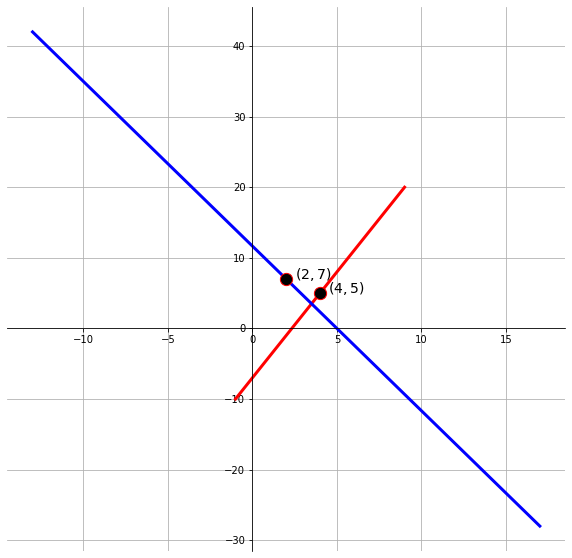

In [32]:
p0 = np.array([[4],[5]])
v0 = np.array([[1],[3]])
p1 = np.array([[2],[7]])
v1 = np.array([[-3],[7]])
paraEqPlot(p0,v0,p1, v1)

## <font face="gotham" color="purple"> 基变换的可视化 </font>

基变换也是一种线性变换。让我们创建一个网格。

In [4]:
u1, u2 = np.linspace(-5, 5, 10), np.linspace(-5, 5, 10)
U1, U2 = np.meshgrid(u1, u2)

我们将$U2$的每一行绘制在$U1$的每一行上。

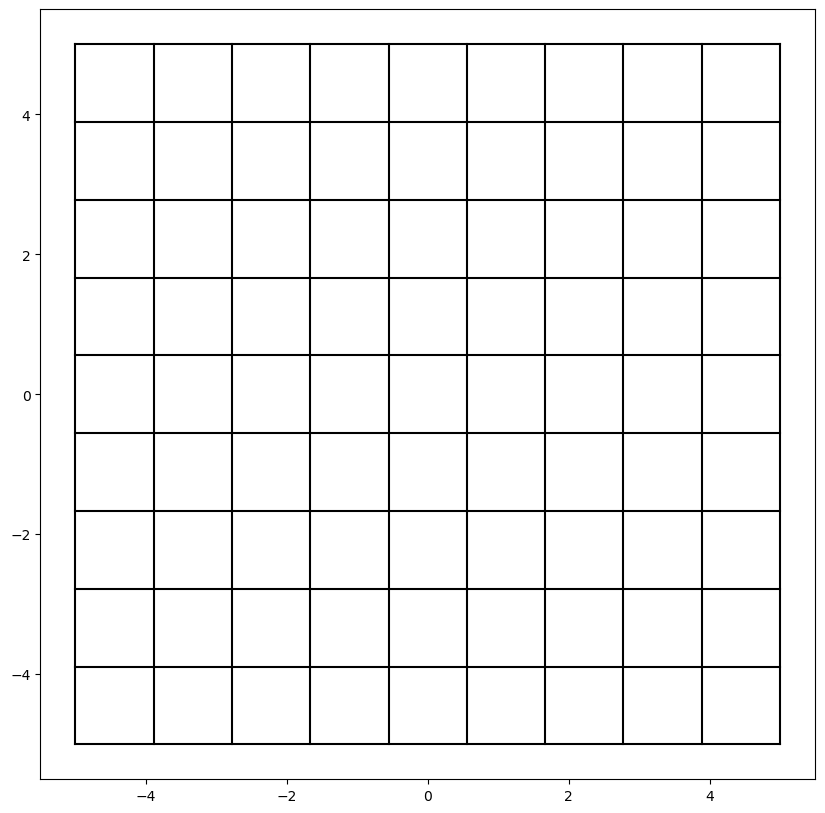

In [5]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(U1,U2, color = 'black') 
ax.plot(U1.T,U2.T, color = 'black') 
plt.show()

设$A$和$B$是$\mathbb{R}^3$中的两个基。
 
$$
A=\left\{\left[\matrix{2\cr 1}\right],\ \left[\matrix{1\cr 1}\right]\right\}\\
B=\left\{\left[\matrix{3\cr 2}\right],\ \left[\matrix{0\cr -1}\right]\right\}\\
$$

如果我们想要用基$A$来表示$B$，我们可以像之前那样构造一个增广矩阵。

$$
[A|B]=
\left[
\begin{matrix}
2 & 1 & 3 & 0\\
1 & 1 & 2 & -1
\end{matrix}
\right]
$$

In [6]:
AB = sy.Matrix([[2,1,3,0],[1,1,2,-1]]); AB.rref()

⎛⎡1  0  1  1 ⎤        ⎞
⎜⎢           ⎥, (0, 1)⎟
⎝⎣0  1  1  -2⎦        ⎠

我们找到过渡矩阵$P_{A\leftarrow B}$
$$
[A|B]=[I|P_{A\leftarrow B}]
$$

我们可以写成

$$
\big[x\big]_A = P_{A\leftarrow B}\big[u\big]_B\\
\left[
\begin{matrix}
x_1\\x_2
\end{matrix}
\right]
=
\left[
\begin{matrix}
1 & 1\\1 & -2
\end{matrix}
\right]
\left[
\begin{matrix}
u_1\\u_2
\end{matrix}
\right]\\
$$

因此
$$
x_1 = u_1+u_2\\
x_2 = u_1 - 2u_2
$$

让我们将原始坐标和变换后的坐标一起绘制。

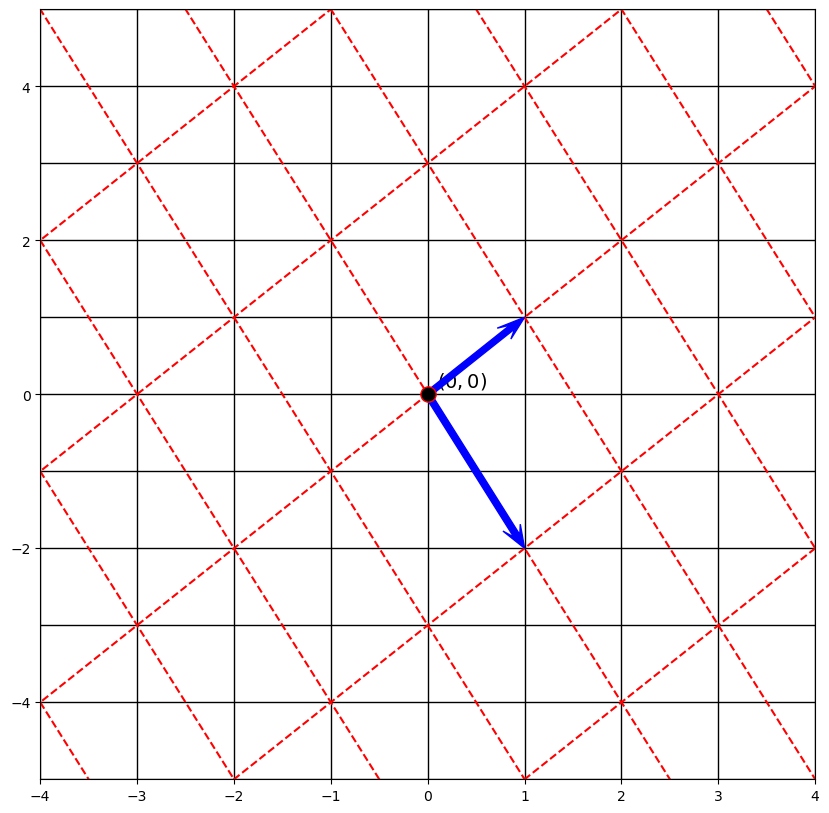

In [7]:
u1, u2 = np.linspace(-10, 10, 21), np.linspace(-10, 10, 21)
U1, U2 = np.meshgrid(u1, u2)

fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(U1,U2, color = 'black', lw = 1) 
ax.plot(U1.T,U2.T, color = 'black', lw = 1) 

X1 = U1 +U2
X2 = U1 - 2*U2
ax.plot(X1,X2, color = 'red', ls = '--') 
ax.plot(X1.T,X2.T, color = 'red', ls = '--') 

ax.arrow(0, 0, 1, 1, color = 'blue', width = .07, 
     length_includes_head = True,
     head_width = .2, # default: 3*width
     head_length = .3, zorder = 4,
     overhang = .4)

ax.arrow(0, 0, 1, -2, color = 'blue', width = .07, 
     length_includes_head = True,
     head_width = .2, # default: 3*width
     head_length = .3,zorder = 4,
     overhang = .4)

ax.text(0.1,0.1,'$(0, 0)$',size = 14)
ax.scatter(0,0,s = 120, zorder = 5, ec = 'red', fc = 'black')

ax.axis([-4, 4, -5, 5])
plt.show()